#Data Selection


In [ ]:
import pandas as pd
import numpy as np

**Load data mahasiswa**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Dataset'

Mounted at /content/drive
/content/drive/MyDrive/Dataset


In [ ]:
df = pd.read_csv('asal_sekolah_kota_asal.csv')
df.head()

,NIM,NAMA,ASAL SEKOLAH,KOTA,PROVINSI,PROGRAM STUDI,THN MASUK
0,10120001,RUDIANSYAH ADI PRASETYO,SMK CIPTA KARYA PREMBUN,Bandung,Jawa Barat,TEKNIK INFORMATIKA-S1,2020
1,10120002,AMBAR OKTALIA SARI,SMAN 1 CILAKU,Karawang,Jawa Barat,TEKNIK INFORMATIKA-S1,2020
2,10120003,BAYU RIFKI ALGHIFARI,SMK TI GARUDA NUSANTARA CIMAHI,Bandung Barat,Jawa Barat,TEKNIK INFORMATIKA-S1,2020
3,10120004,MUHAMMAD FARIZ RAHMAT A,SMAN 1 CIBADAK,Sukabumi,Jawa Barat,TEKNIK INFORMATIKA-S1,2020
4,10120005,FAHRIZAL ZAMIL MAR'IPATULLAH,SMA NEGERI 1 KLARI,Karawang,Jawa Barat,TEKNIK INFORMATIKA-S1,2020


In [ ]:
#filter jurusan Sistem Informasi

df_sistem_informasi = df[df['PROGRAM STUDI'] == 'SISTEM INFORMASI-S1']
df_sistem_informasi.head()

,NIM,NAMA,ASAL SEKOLAH,KOTA,PROVINSI,PROGRAM STUDI,THN MASUK
1712,10520001,DIAN ANANDA LESTARI,SMA PASUNDAN 2,Bandung,Jawa Barat,SISTEM INFORMASI-S1,2020
1713,10520003,ADITYA RAMADHAN SUHERMAN,SMK MAARIF TERPADU,Bandung,Jawa Barat,SISTEM INFORMASI-S1,2020
1714,10520004,FADHIIL JABBAR SP,SMK TELKOM BANDUNG,Bandung,Jawa Barat,SISTEM INFORMASI-S1,2020
1715,10520005,DIVO IKHSAN MARDHOTILLAH,SMA NEGERI 2 CIAMIS,Ciamis,Jawa Barat,SISTEM INFORMASI-S1,2020
1716,10520006,DYLAN REVINA SOPYAN,SMK CILEDUG ALMUSADDADIYAH GARUT,Garut,Jawa Barat,SISTEM INFORMASI-S1,2020


In [ ]:
# hitung jumlah mahasiswa berdasarkan kota asal
# asal mahasiswa diabaikan

student_per_city = df_sistem_informasi['KOTA'].value_counts()
student_per_city

,count
KOTA,
Bandung,158
Bandung Barat,36
Cimahi,31
Subang,17
Cianjur,16
...,...
Padang Sidempuan,1
Cilegon,1
Bengkulu Selatan,1


**Handling missing value**

In [ ]:
# mengecek missing value dalam dataset
df_sistem_informasi.isna().sum()

,0
NIM,0
NAMA,0
ASAL SEKOLAH,15
KOTA,2
PROVINSI,1
PROGRAM STUDI,0
THN MASUK,0


In [ ]:
# drop missing value dalam dataset
df_sistem_informasi = df_sistem_informasi.dropna()

In [ ]:
# pengecekan kembali missing value
df_sistem_informasi.isna().sum()

,0
NIM,0
NAMA,0
ASAL SEKOLAH,0
KOTA,0
PROVINSI,0
PROGRAM STUDI,0
THN MASUK,0


**Load data kuesioner**

In [ ]:
# load data kuesioner

df_questionnaire = pd.read_csv('Kuesioner Penelitian Skripsi.csv')
df_questionnaire.head()

,Timestamp,Email address,NIM,Tahun Masuk,Asal Kota,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,10/05/2024 20:56:25,deyal.10520711@mahasiswa.unikom.ac.id,10520711,2020,Palu,2.4,2.4,4.0,2.4,3.6,3.6,4.0
1,10/05/2024 20:56:49,ervancjr1@gmail.com,10520734,2020,Cianjur,3.8,3.2,4.2,3.8,3.6,4.6,4.4
2,10/05/2024 21:00:22,hammamazmi081202@gmail.com,10520706,2020,Palembang,2.6,3.4,3.6,5.0,3.4,4.2,3.8
3,10/05/2024 21:10:02,ziyannafissalam15@gmail.com,10520113,2020,Tangerang,3.6,2.6,3.4,3.6,4.2,3.0,4.2
4,10/05/2024 21:15:09,erich.10520733@mahasiswa.unikom.ac.id,10520733,2020,Sukabumi,3.8,3.4,4.6,4.0,4.0,4.0,4.4


**Merge data mahasiswa dan data kuesioner**

In [ ]:
# merge df_sistem_informasi dan df_questionnaire

merged_df = pd.merge(df_sistem_informasi, df_questionnaire, on='NIM', how='inner')
merged_df.head()

,NIM,NAMA,ASAL SEKOLAH,KOTA,PROVINSI,PROGRAM STUDI,THN MASUK,Timestamp,Email address,Tahun Masuk,Asal Kota,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,10520001,DIAN ANANDA LESTARI,SMA PASUNDAN 2,Bandung,Jawa Barat,SISTEM INFORMASI-S1,2020,16/05/2024 15:16:17,dianananda723@gmail.com,2020,Bandung,3.8,3.8,3.8,4.0,3.8,4.4,4.8
1,10520013,KUNCORO WISNU JATI,SMAN 1 PANDEGLANG,Pandeglang,Banten,SISTEM INFORMASI-S1,2020,20/05/2024 21:16:20,wisnujati29@gmail.com,2020,Pandeglang,3.8,4.2,4.4,3.6,4.8,4.6,4.0
2,10520026,SHARIAR CALABRIA ISLAM TAUFIK,PONDOK MODERN DAARUSSALAM GONTOR,Bogor,Jawa Barat,SISTEM INFORMASI-S1,2020,16/05/2024 12:27:13,shariarcalabria@gmail.com,2020,Bogor,3.0,3.0,3.8,3.4,4.0,3.4,3.0
3,10520031,ZAIN SYAKIR NAUFAL,SMA 1 CIRANJANG,Bogor,Jawa Barat,SISTEM INFORMASI-S1,2020,20/05/2024 21:41:11,syakirzain0@gmail.com,2020,Cianjur,3.6,4.0,4.6,4.6,5.0,4.0,4.8
4,10520041,AGHNIA MAULINA,SMKN 4 PADALARANG,Bandung Barat,Jawa Barat,SISTEM INFORMASI-S1,2020,15/05/2024 20:49:14,aghniamaulina16@gmail.com,2020,Bandung,3.4,3.4,4.2,3.4,3.8,4.2,3.0


In [ ]:
# drop feature yang tidak diperlukan
merged_df = merged_df.drop(columns=['THN MASUK', 'Email address', 'Asal Kota',
                                    'ASAL SEKOLAH', 'Tahun Masuk',
                                    'PROGRAM STUDI'])
merged_df.head()

,NIM,NAMA,KOTA,PROVINSI,Timestamp,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,10520001,DIAN ANANDA LESTARI,Bandung,Jawa Barat,16/05/2024 15:16:17,3.8,3.8,3.8,4.0,3.8,4.4,4.8
1,10520013,KUNCORO WISNU JATI,Pandeglang,Banten,20/05/2024 21:16:20,3.8,4.2,4.4,3.6,4.8,4.6,4.0
2,10520026,SHARIAR CALABRIA ISLAM TAUFIK,Bogor,Jawa Barat,16/05/2024 12:27:13,3.0,3.0,3.8,3.4,4.0,3.4,3.0
3,10520031,ZAIN SYAKIR NAUFAL,Bogor,Jawa Barat,20/05/2024 21:41:11,3.6,4.0,4.6,4.6,5.0,4.0,4.8
4,10520041,AGHNIA MAULINA,Bandung Barat,Jawa Barat,15/05/2024 20:49:14,3.4,3.4,4.2,3.4,3.8,4.2,3.0


In [ ]:
# penyesuain feature yang dibutuhkan dalam dataset
fixed_df = merged_df[['Timestamp', 'NIM', 'NAMA', 'KOTA', 'PROVINSI', 'PRODUCT',
                       'PRICE', 'PLACE', 'PROMOTION', 'PEOPLE', 'PROCESS',
                       'PHYSICAL EVIDENCE']]

fixed_df.head()

,Timestamp,NIM,NAMA,KOTA,PROVINSI,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,16/05/2024 15:16:17,10520001,DIAN ANANDA LESTARI,Bandung,Jawa Barat,3.8,3.8,3.8,4.0,3.8,4.4,4.8
1,20/05/2024 21:16:20,10520013,KUNCORO WISNU JATI,Pandeglang,Banten,3.8,4.2,4.4,3.6,4.8,4.6,4.0
2,16/05/2024 12:27:13,10520026,SHARIAR CALABRIA ISLAM TAUFIK,Bogor,Jawa Barat,3.0,3.0,3.8,3.4,4.0,3.4,3.0
3,20/05/2024 21:41:11,10520031,ZAIN SYAKIR NAUFAL,Bogor,Jawa Barat,3.6,4.0,4.6,4.6,5.0,4.0,4.8
4,15/05/2024 20:49:14,10520041,AGHNIA MAULINA,Bandung Barat,Jawa Barat,3.4,3.4,4.2,3.4,3.8,4.2,3.0


In [ ]:
fixed_df.head()

,Timestamp,NIM,NAMA,KOTA,PROVINSI,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,16/05/2024 15:16:17,10520001,DIAN ANANDA LESTARI,Bandung,Jawa Barat,3.8,3.8,3.8,4.0,3.8,4.4,4.8
1,20/05/2024 21:16:20,10520013,KUNCORO WISNU JATI,Pandeglang,Banten,3.8,4.2,4.4,3.6,4.8,4.6,4.0
2,16/05/2024 12:27:13,10520026,SHARIAR CALABRIA ISLAM TAUFIK,Bogor,Jawa Barat,3.0,3.0,3.8,3.4,4.0,3.4,3.0
3,20/05/2024 21:41:11,10520031,ZAIN SYAKIR NAUFAL,Bogor,Jawa Barat,3.6,4.0,4.6,4.6,5.0,4.0,4.8
4,15/05/2024 20:49:14,10520041,AGHNIA MAULINA,Bandung Barat,Jawa Barat,3.4,3.4,4.2,3.4,3.8,4.2,3.0


# Data Preprocessing

**Handling missing value**

In [ ]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          106 non-null    object 
 1   NIM                106 non-null    int64  
 2   NAMA               106 non-null    object 
 3   KOTA               106 non-null    object 
 4   PROVINSI           106 non-null    object 
 5   PRODUCT            102 non-null    float64
 6   PRICE              102 non-null    float64
 7   PLACE              102 non-null    float64
 8   PROMOTION          102 non-null    float64
 9   PEOPLE             102 non-null    float64
 10  PROCESS            102 non-null    float64
 11  PHYSICAL EVIDENCE  102 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 10.1+ KB


In [ ]:
# mengecek missing value dalam dataset
fixed_df.isna().sum()

,0
Timestamp,0
NIM,0
NAMA,0
KOTA,0
PROVINSI,0
PRODUCT,4
PRICE,4
PLACE,4
PROMOTION,4
PEOPLE,4


In [ ]:
# mengisi missing value dengan nilai rata rata
fixed_df.fillna(fixed_df.mean(numeric_only=True).round(1), inplace=True)
fixed_df.head()

,Timestamp,NIM,NAMA,KOTA,PROVINSI,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,16/05/2024 15:16:17,10520001,DIAN ANANDA LESTARI,Bandung,Jawa Barat,3.8,3.8,3.8,4.0,3.8,4.4,4.8
1,20/05/2024 21:16:20,10520013,KUNCORO WISNU JATI,Pandeglang,Banten,3.8,4.2,4.4,3.6,4.8,4.6,4.0
2,16/05/2024 12:27:13,10520026,SHARIAR CALABRIA ISLAM TAUFIK,Bogor,Jawa Barat,3.0,3.0,3.8,3.4,4.0,3.4,3.0
3,20/05/2024 21:41:11,10520031,ZAIN SYAKIR NAUFAL,Bogor,Jawa Barat,3.6,4.0,4.6,4.6,5.0,4.0,4.8
4,15/05/2024 20:49:14,10520041,AGHNIA MAULINA,Bandung Barat,Jawa Barat,3.4,3.4,4.2,3.4,3.8,4.2,3.0


In [ ]:
# mengecek kembali missing value dalam dataset

fixed_df.isna().sum()

,0
Timestamp,0
NIM,0
NAMA,0
KOTA,0
PROVINSI,0
PRODUCT,0
PRICE,0
PLACE,0
PROMOTION,0
PEOPLE,0


**Handling Outliers**

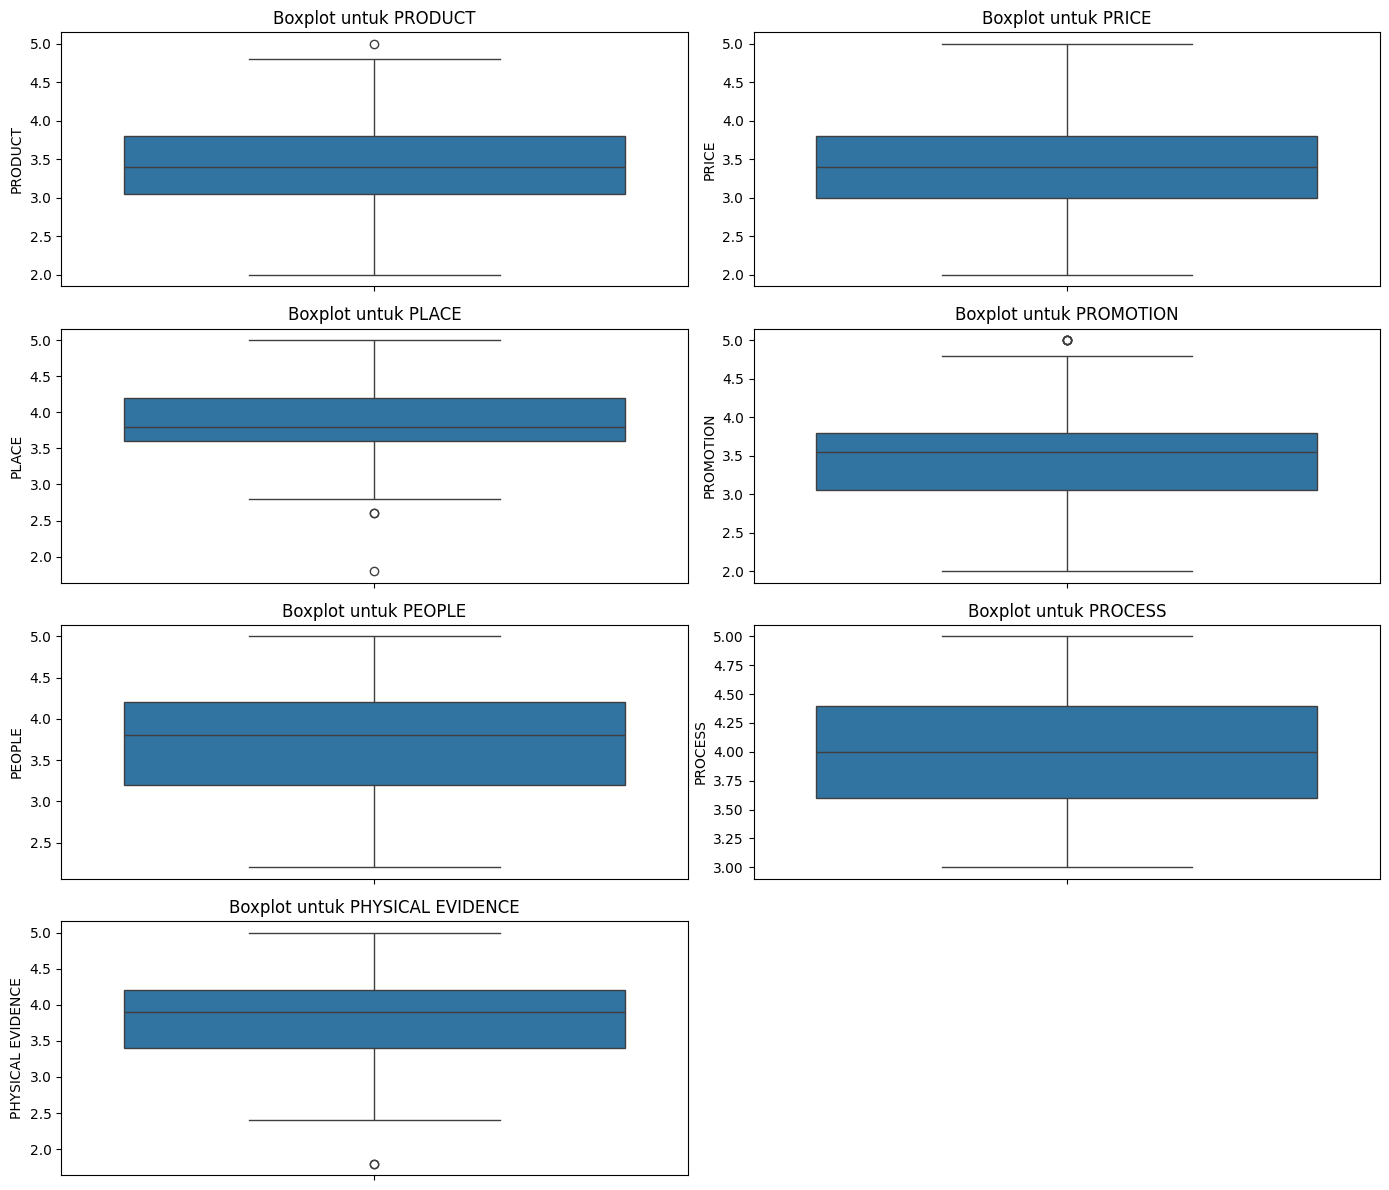

In [ ]:
# Mengecek outliers untuk kolom PRODUCT,  PRICE, PLACE, PROMOTION, PEOPLE, PROCESS, PHYSICAL EVIDENCE

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# memilih outlier mana saja yang akan dicek outliernya
outlier_columns = fixed_df[['PRODUCT', 'PRICE', 'PLACE', 'PROMOTION', 'PEOPLE', 'PROCESS', 'PHYSICAL EVIDENCE']]

# Set the figure size
plt.figure(figsize=(14, 12))

# Membuat boxplot untuk masing-masing kolom
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=fixed_df, y=col)
    plt.title(f'Boxplot untuk {col}')

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
# Handle nilai outlier dengan nilai median tiap kolomnya
for col in outlier_columns:
    median = fixed_df[col].median()
    std_dev = fixed_df[col].std()

    upper_bound = median + 2 * std_dev
    lower_bound = median - 2 * std_dev

    # Create masks for the outliers
    upper_mask = fixed_df[col] > upper_bound
    lower_mask = fixed_df[col] < lower_bound

    # Replace outliers with median
    fixed_df.loc[upper_mask, col] = median
    fixed_df.loc[lower_mask, col] = median


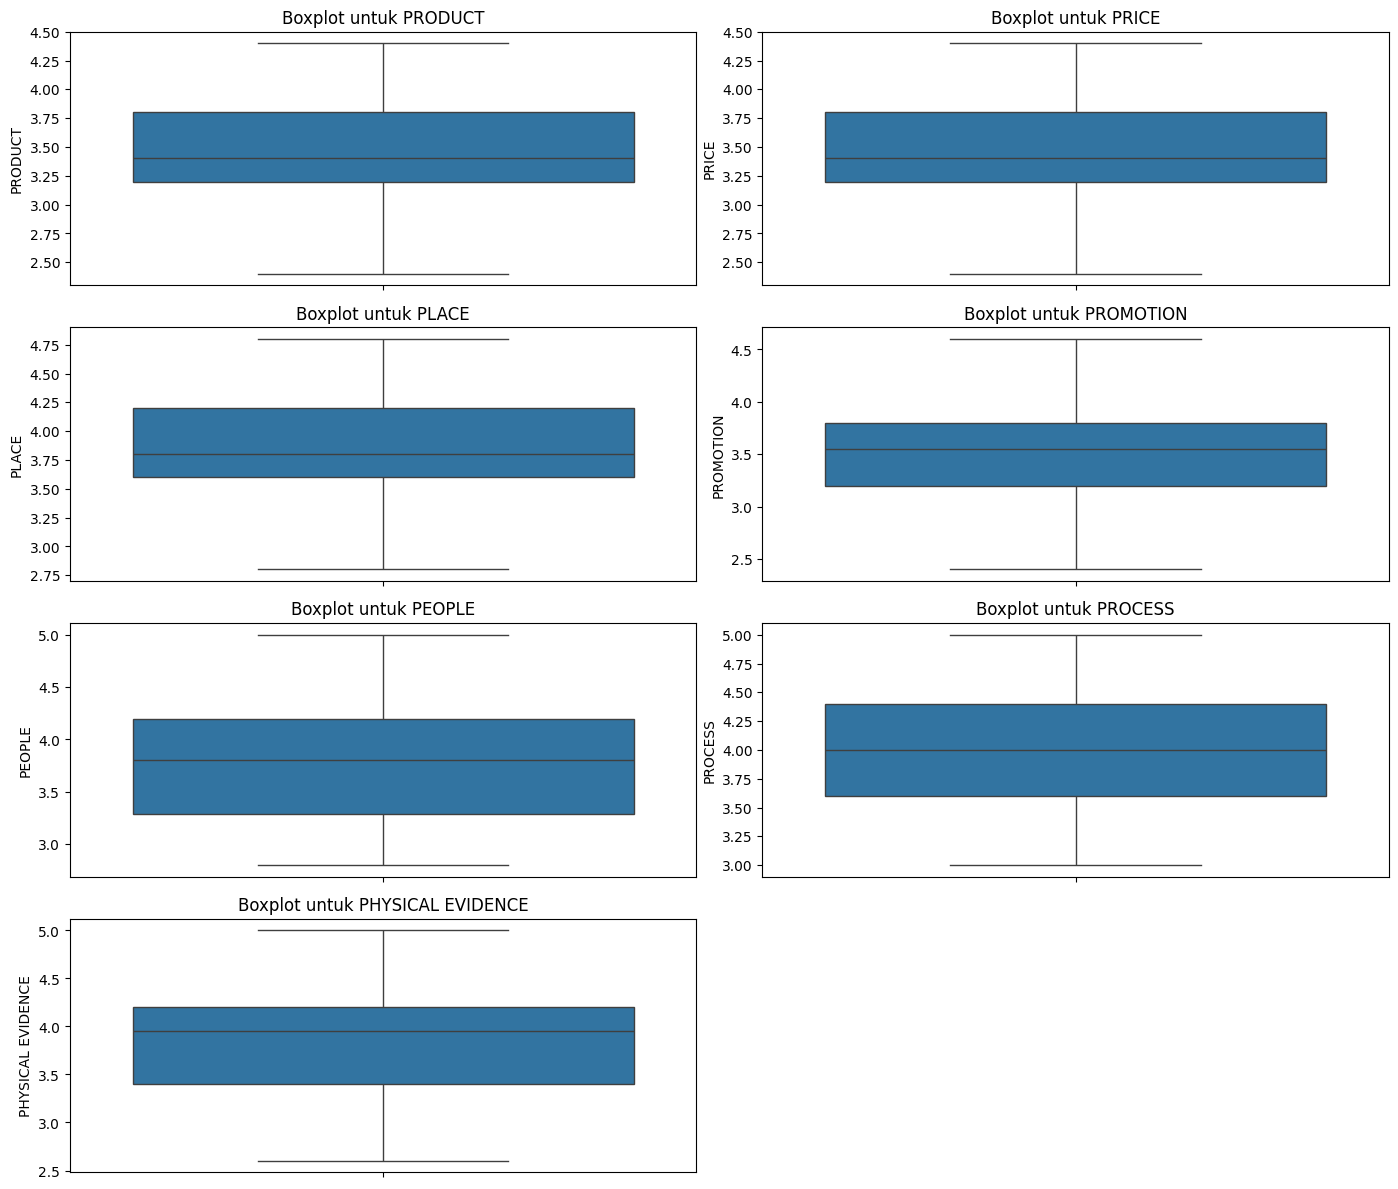

In [ ]:
# Mengecek outlier kembali dengan boxplot

# set ukuran gambar
plt.figure(figsize=(14, 12))
# recheck outlier
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=fixed_df, y=col)
    plt.title(f'Boxplot untuk {col}')

# mengatur layout
plt.tight_layout()
plt.show()

In [ ]:
# mengecek rows yang duplikat dalam dataset
fixed_df.duplicated().sum()

0

# Data Transformation

**Feature Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ['PRODUCT', 'PRICE', 'PLACE', 'PROMOTION', 'PEOPLE', 'PROCESS', 'PHYSICAL EVIDENCE']
data_to_scale = fixed_df[columns_to_scale]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame from the scaled features
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Replace the original columns in 'fixed_df' with the scaled ones
fixed_df[columns_to_scale] = scaled_df

# Now 'fixed_df' contains the scaled values for the specified columns and the original values for the rest

In [ ]:
fixed_df

,Timestamp,NIM,NAMA,KOTA,PROVINSI,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,16/05/2024 15:16:17,10520001,DIAN ANANDA LESTARI,Bandung,Jawa Barat,0.845675,0.801206,-0.066411,1.132737,0.009027,0.736945,1.593268
1,20/05/2024 21:16:20,10520013,KUNCORO WISNU JATI,Pandeglang,Banten,0.845675,1.659063,1.253511,0.257112,1.748818,1.084128,0.218811
2,16/05/2024 12:27:13,10520026,SHARIAR CALABRIA ISLAM TAUFIK,Bogor,Jawa Barat,-0.965266,-0.914508,-0.066411,-0.180701,0.356985,-0.998970,-1.499261
3,20/05/2024 21:41:11,10520031,ZAIN SYAKIR NAUFAL,Bogor,Jawa Barat,0.392940,1.230134,1.693486,2.446175,2.096776,0.042579,1.593268
4,15/05/2024 20:49:14,10520041,AGHNIA MAULINA,Bandung Barat,Jawa Barat,-0.059795,-0.056651,0.813537,-0.180701,0.009027,0.389762,-1.499261
...,...,...,...,...,...,...,...,...,...,...,...,...
101,20/05/2024 20:38:04,10522187,WINDY THALIA SALSABILLAH,Tarakan,Kalimantan Timur,1.298410,0.372277,-0.066411,0.694924,1.052902,1.778493,1.593268
102,20/05/2024 22:34:35,10522197,REISHA GUSTIE IMANUEL,Bandung,Jawa Barat,-0.512530,-0.056651,0.813537,0.257112,-0.338931,-0.304604,-0.124803
103,20/05/2024 22:55:53,10522199,JOE BRYAN,Bandung,Jawa Barat,0.845675,1.659063,1.693486,1.570550,1.400860,1.084128,0.562425
104,20/05/2024 20:08:10,10522201,ALNI APRILIANI,Indramayu,Jawa Barat,-0.059795,0.372277,-0.946360,1.570550,-0.686889,0.736945,0.906040


In [ ]:
unique_cities = fixed_df['KOTA'].unique()
unique_cities

array(['Bandung', 'Pandeglang', 'Bogor', 'Bandung Barat', 'Cimahi',
       'Bekasi', 'Majalengka', 'Bangka Selatan', 'Lampung Selatan',
       'Bolaang Mongondow Selatan', 'Cianjur', 'Karawang', 'Gresik',
       'Tasikmalaya', 'Subang', 'Jakarta Utara', 'Garut', 'Sumedang',
       'Sukabumi', 'Kepulauan Mentawai', 'Tangerang', 'Palembang',
       'Kupang', 'Lebak', 'Sigi', 'Pidie', 'Banjarnegara',
       'Jakarta Selatan', 'Merangin', 'Nias Selatan', 'Indramayu',
       'Tambrauw', 'Kutai Timur', 'Indragiri Hilir', 'Cirebon', 'Sibolga',
       'Bangka Tengah', 'Padang', 'Banyumas', 'Tarakan'], dtype=object)

In [ ]:
fixed_df['KOTA'].nunique()

40

In [ ]:
# Create a mapping from city names to numbers
city_to_number = {city: idx + 1 for idx, city in enumerate(unique_cities)}

# Transform the 'KOTA' column using the mapping
fixed_df['KOTA'] = fixed_df['KOTA'].map(city_to_number)

fixed_df

,Timestamp,NIM,NAMA,KOTA,PROVINSI,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,16/05/2024 15:16:17,10520001,DIAN ANANDA LESTARI,1,Jawa Barat,0.845675,0.801206,-0.066411,1.132737,0.009027,0.736945,1.593268
1,20/05/2024 21:16:20,10520013,KUNCORO WISNU JATI,2,Banten,0.845675,1.659063,1.253511,0.257112,1.748818,1.084128,0.218811
2,16/05/2024 12:27:13,10520026,SHARIAR CALABRIA ISLAM TAUFIK,3,Jawa Barat,-0.965266,-0.914508,-0.066411,-0.180701,0.356985,-0.998970,-1.499261
3,20/05/2024 21:41:11,10520031,ZAIN SYAKIR NAUFAL,3,Jawa Barat,0.392940,1.230134,1.693486,2.446175,2.096776,0.042579,1.593268
4,15/05/2024 20:49:14,10520041,AGHNIA MAULINA,4,Jawa Barat,-0.059795,-0.056651,0.813537,-0.180701,0.009027,0.389762,-1.499261
...,...,...,...,...,...,...,...,...,...,...,...,...
101,20/05/2024 20:38:04,10522187,WINDY THALIA SALSABILLAH,40,Kalimantan Timur,1.298410,0.372277,-0.066411,0.694924,1.052902,1.778493,1.593268
102,20/05/2024 22:34:35,10522197,REISHA GUSTIE IMANUEL,1,Jawa Barat,-0.512530,-0.056651,0.813537,0.257112,-0.338931,-0.304604,-0.124803
103,20/05/2024 22:55:53,10522199,JOE BRYAN,1,Jawa Barat,0.845675,1.659063,1.693486,1.570550,1.400860,1.084128,0.562425
104,20/05/2024 20:08:10,10522201,ALNI APRILIANI,31,Jawa Barat,-0.059795,0.372277,-0.946360,1.570550,-0.686889,0.736945,0.906040


In [ ]:
# hitung banyak value yang ada di KOTA dan sort secara descending, menampilkan sepuluh kota dengan nilai value terbanyak

top_10_cities = fixed_df['KOTA'].value_counts().sort_values(ascending=False).head(10)
print(top_10_cities)

KOTA
1     32
11     6
5      5
21     5
6      4
15     4
4      3
3      3
19     3
14     3
Name: count, dtype: int64


In [ ]:
# drop rows yang tidak termasuk dalam top 10 cities yang sudah kita buat sebelumnya

def drop_rows_not_in_top_10(df, top_10_cities):
  top_10_cities = fixed_df['KOTA'].value_counts().sort_values(ascending=False).head(10)

  # Get the list of top 10 cities
  top_10_cities_list = top_10_cities.index.tolist()

  # Filter the DataFrame to keep only rows with cities in the top 10
  fixed_df = fixed_df[fixed_df['KOTA'].isin(top_10_cities_list)]


<ipython-input-29-93904f9f35e2>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fixed_df['Timestamp'] = pd.to_datetime(fixed_df['Timestamp'])  # Convert to datetime objects


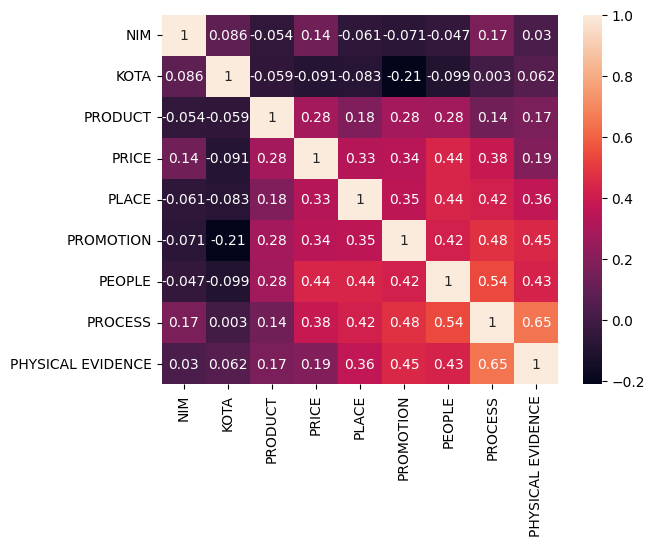

In [ ]:
import seaborn as sns

fixed_df['Timestamp'] = pd.to_datetime(fixed_df['Timestamp'])  # Convert to datetime objects

# Extract numerical features for correlation
numerical_df = fixed_df.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [ ]:
fixed_df['PROVINSI'].unique()

array(['Jawa Barat', 'Banten', 'Bangka Belitung', 'Lampung',
       'Sulawesi Utara', 'Jawa Timur', 'DKI Jakarta', 'Sumatera Barat',
       'Sumatera Selatan', 'Nusa Tenggara Timur', 'Sulawesi Tengah',
       'Nanggroe Aceh Darussalam (NAD)', 'Jawa Tengah', 'Jambi',
       'Sumatera Utara', 'Papua Barat', 'Kalimantan Timur', 'Riau'],
      dtype=object)

In [ ]:
fixed_df.shape

(106, 12)

# Data Mining


In [ ]:
features = ['PRODUCT', 'PRICE', 'PLACE', 'PROMOTION', 'PEOPLE', 'PROCESS', 'PHYSICAL EVIDENCE']
data = fixed_df[features]
data

,PRODUCT,PRICE,PLACE,PROMOTION,PEOPLE,PROCESS,PHYSICAL EVIDENCE
0,0.845675,0.801206,-0.066411,1.132737,0.009027,0.736945,1.593268
1,0.845675,1.659063,1.253511,0.257112,1.748818,1.084128,0.218811
2,-0.965266,-0.914508,-0.066411,-0.180701,0.356985,-0.998970,-1.499261
3,0.392940,1.230134,1.693486,2.446175,2.096776,0.042579,1.593268
4,-0.059795,-0.056651,0.813537,-0.180701,0.009027,0.389762,-1.499261
...,...,...,...,...,...,...,...
101,1.298410,0.372277,-0.066411,0.694924,1.052902,1.778493,1.593268
102,-0.512530,-0.056651,0.813537,0.257112,-0.338931,-0.304604,-0.124803
103,0.845675,1.659063,1.693486,1.570550,1.400860,1.084128,0.562425
104,-0.059795,0.372277,-0.946360,1.570550,-0.686889,0.736945,0.906040


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRODUCT            106 non-null    float64
 1   PRICE              106 non-null    float64
 2   PLACE              106 non-null    float64
 3   PROMOTION          106 non-null    float64
 4   PEOPLE             106 non-null    float64
 5   PROCESS            106 non-null    float64
 6   PHYSICAL EVIDENCE  106 non-null    float64
dtypes: float64(7)
memory usage: 5.9 KB


Inertia for k=1: 742.0000
Inertia for k=2: 518.5475
Inertia for k=3: 442.6297
Inertia for k=4: 394.9768
Inertia for k=5: 366.1397
Inertia for k=6: 345.7983
Inertia for k=7: 318.0376
Inertia for k=8: 300.2397
Inertia for k=9: 281.7698
Inertia for k=10: 271.9245


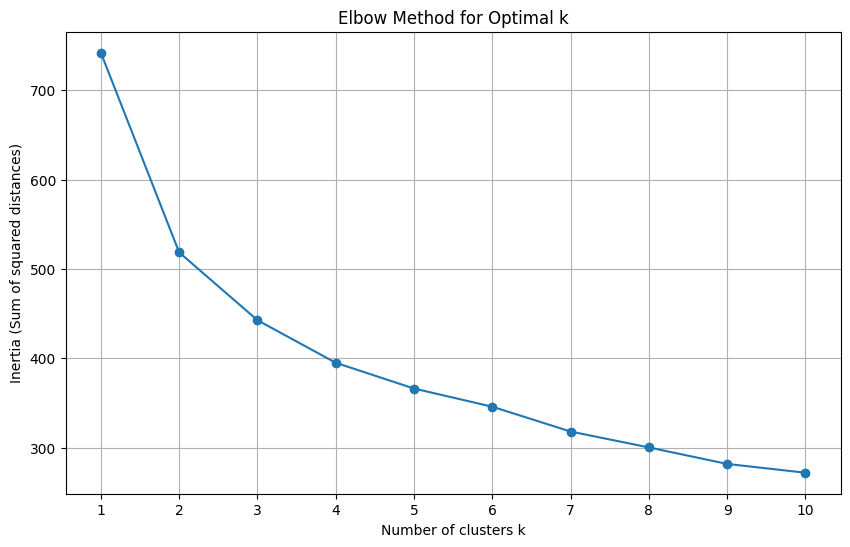

In [ ]:
#mencari nilai elbow method

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_inertia(data, k_range):
    inertia_values = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
        print(f'Inertia for k={k}: {kmeans.inertia_:.4f}')

    return inertia_values

def plot_elbow(k_range, inertia_values):
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Inertia (Sum of squared distances)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

#masukkan nilai ke dalam fungsi
k_range = range(1, 11)  # Example range from 1 to 10 clusters

#menghitung inertia untuk range k values
inertia_values = calculate_inertia(data, k_range)

#plot elbow method
plot_elbow(k_range, inertia_values)



In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def clustering(data, optimal_k):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)

    inertia_scores = []
    random_states = []

    # Finding the best random state based on inertia scores
    for i in range(10):
        kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=i)
        kmeans.fit(pca_data)
        labels = kmeans.labels_

        # Store inertia scores and random states
        inertia_scores.append(kmeans.inertia_)
        random_states.append(i)

    # Fit final model with the best random state
    best_index = inertia_scores.index(min(inertia_scores))
    best_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=10, random_state=random_states[best_index])
    best_kmeans.fit(pca_data)

    column_names = data.columns
    cluster_data = pd.DataFrame(data, columns=column_names)
    cluster_data['Cluster'] = best_kmeans.labels_

    return cluster_data, pca_data, best_kmeans

# Assuming 'data' is your DataFrame with the dataset
optimal_k = int(input("Enter the number of clusters: "))

cluster_data, pca_data, best_kmeans = clustering(data, optimal_k)

print(cluster_data.head())


Enter the number of clusters: 3
    PRODUCT     PRICE     PLACE  PROMOTION    PEOPLE   PROCESS  \
0  0.845675  0.801206 -0.066411   1.132737  0.009027  0.736945   
1  0.845675  1.659063  1.253511   0.257112  1.748818  1.084128   
2 -0.965266 -0.914508 -0.066411  -0.180701  0.356985 -0.998970   
3  0.392940  1.230134  1.693486   2.446175  2.096776  0.042579   
4 -0.059795 -0.056651  0.813537  -0.180701  0.009027  0.389762   

   PHYSICAL EVIDENCE  Cluster  
0           1.593268        1  
1           0.218811        1  
2          -1.499261        2  
3           1.593268        1  
4          -1.499261        0  


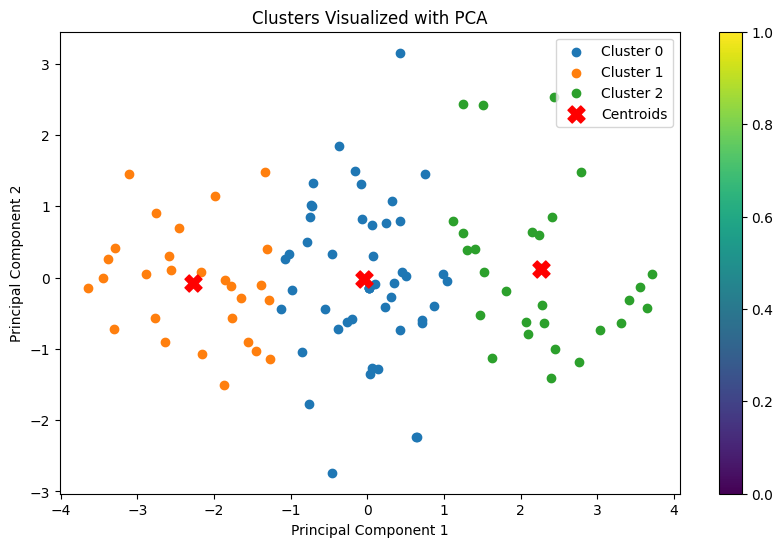

In [ ]:
def plot_clusters(cluster_data, pca_data, centroids):
    plt.figure(figsize=(10, 6))

    for cluster in range(cluster_data['Cluster'].nunique()):
        cluster_data_cluster = pca_data[cluster_data['Cluster'] == cluster]
        scatter = plt.scatter(cluster_data_cluster[:, 0], cluster_data_cluster[:, 1], label=f'Cluster {cluster}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', marker='X', label='Centroids')

    plt.title('Clusters Visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter)
    plt.legend()
    plt.show()

# Get centroids of the clusters in PCA-transformed space
centroids = best_kmeans.cluster_centers_

plot_clusters(cluster_data, pca_data, centroids)

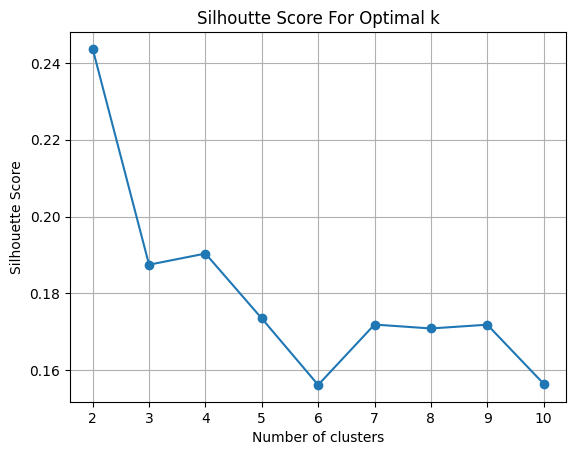

In [ ]:
from sklearn.metrics import silhouette_score

silhoutte_score = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(data)
  labels = kmeans.labels_
  silhoutte_score.append(silhouette_score(data, labels))

plt.plot(range(2, 11), silhoutte_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.title('Silhoutte Score For Optimal k')
plt.show()

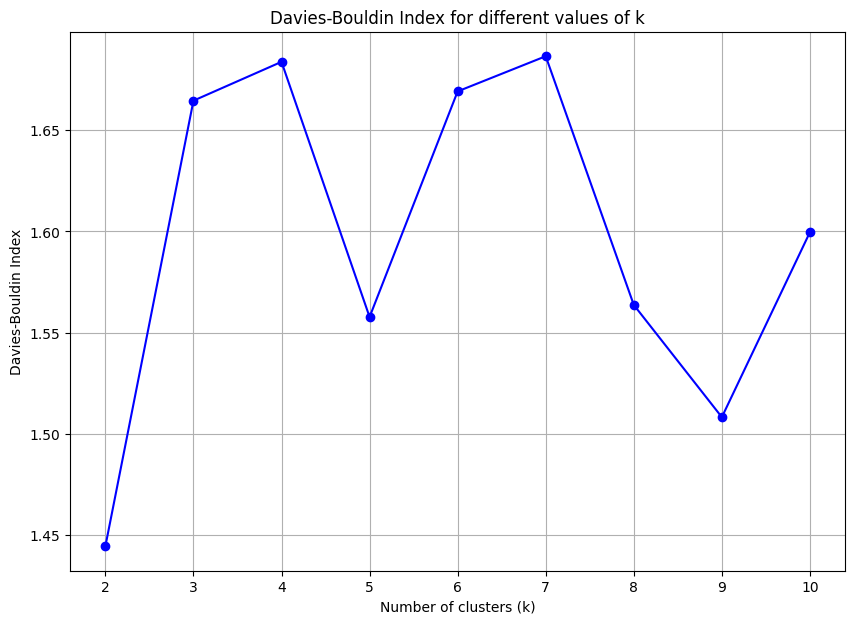

In [ ]:
from sklearn.metrics import davies_bouldin_score

def plot_dbi_for_range(data, max_k):
    dbi_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        dbi = davies_bouldin_score(data, labels)
        dbi_scores.append((k, dbi))

    # Extract k values and their corresponding DBI scores
    k_values, dbi_values = zip(*dbi_scores)

    # Plot the DBI scores
    plt.figure(figsize=(10, 7))
    plt.plot(k_values, dbi_values, marker='o', linestyle='-', color='b')
    plt.title('Davies-Bouldin Index for different values of k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

max_k = 10
plot_dbi_for_range(data, max_k)

In [ ]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
dbi = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index for k=3: {dbi}")


Davies-Bouldin Index for k=3: 1.6645786314264834


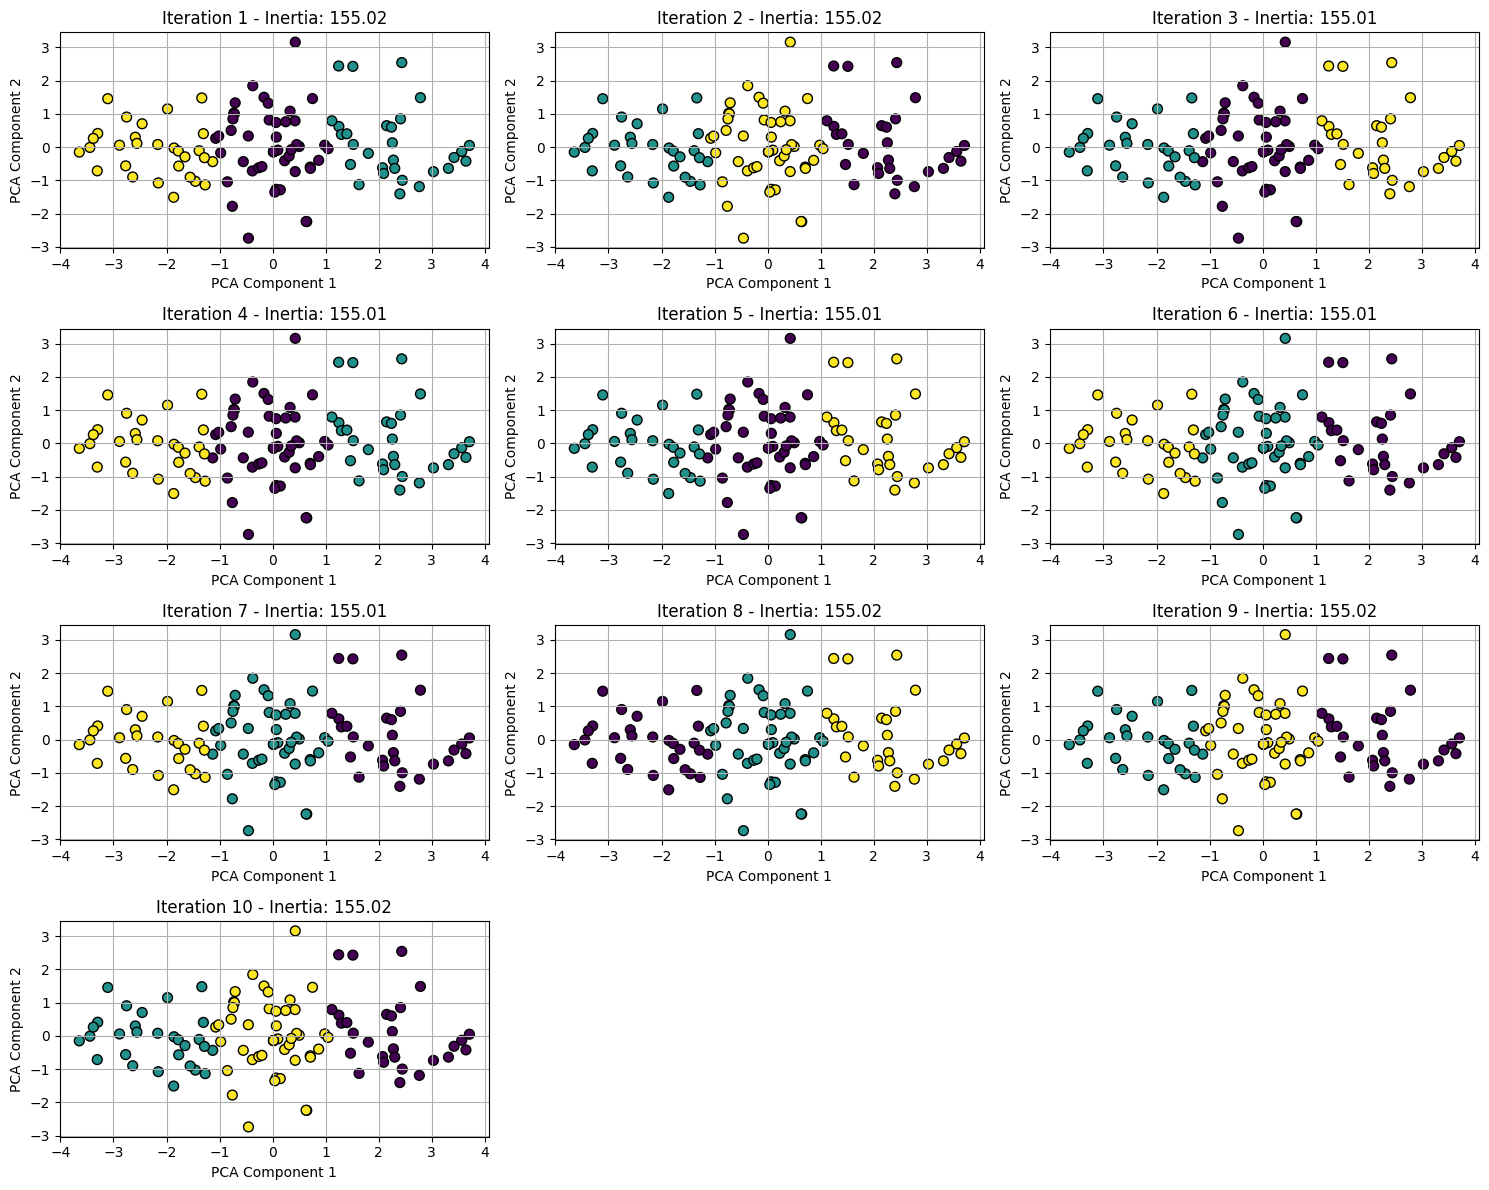

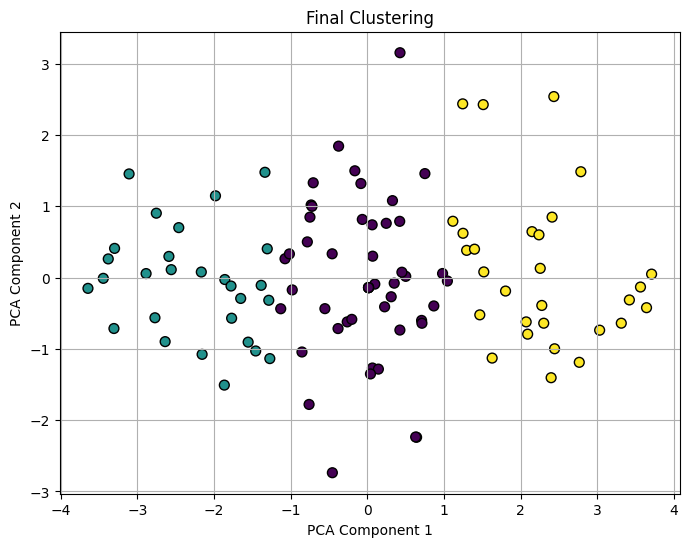

    PRODUCT     PRICE     PLACE  PROMOTION    PEOPLE   PROCESS  \
0  0.845675  0.801206 -0.066411   1.132737  0.009027  0.736945   
1  0.845675  1.659063  1.253511   0.257112  1.748818  1.084128   
2 -0.965266 -0.914508 -0.066411  -0.180701  0.356985 -0.998970   
3  0.392940  1.230134  1.693486   2.446175  2.096776  0.042579   
4 -0.059795 -0.056651  0.813537  -0.180701  0.009027  0.389762   

   PHYSICAL EVIDENCE  Cluster  
0           1.593268        1  
1           0.218811        1  
2          -1.499261        2  
3           1.593268        1  
4          -1.499261        0  


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def clustering(data, optimal_k):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)

    inertia_scores = []
    random_states = []

    plt.figure(figsize=(15, 12))

    # Plotting for each iteration
    for i in range(10):
        kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=i)
        kmeans.fit(pca_data)
        labels = kmeans.labels_

        # Store inertia scores and random states
        inertia_scores.append(kmeans.inertia_)
        random_states.append(i)

        # Plot the clusters for this iteration
        plt.subplot(4, 3, i+1)
        plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
        plt.title(f'Iteration {i+1} - Inertia: {kmeans.inertia_:.2f}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Fit final model with the best random state
    best_index = inertia_scores.index(min(inertia_scores))
    best_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=1000, n_init=10, random_state=random_states[best_index])
    best_kmeans.fit(pca_data)

    column_names = data.columns
    cluster_data = pd.DataFrame(data, columns=column_names)
    cluster_data['Cluster'] = best_kmeans.labels_

    # Plot final clustering
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('Final Clustering')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

    return cluster_data, pca_data

# Assuming 'data' is your DataFrame with the dataset
# optimal_k = int(input("Enter the number of clusters: "))
optimal_k = 3  # Example value, replace with actual value or input

cluster_data, pca_data = clustering(data, optimal_k)

print(cluster_data.head())


Enter the number of clusters: 3


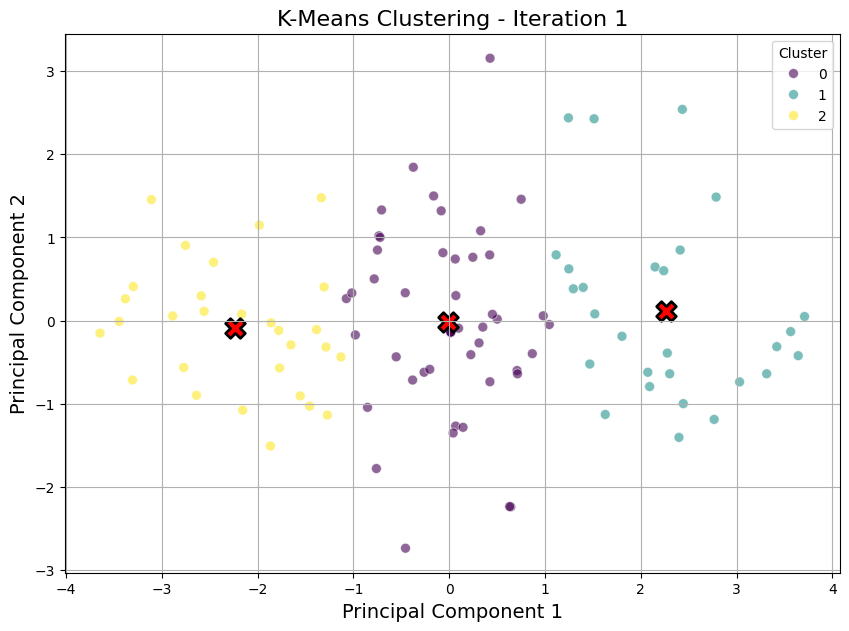

    PRODUCT     PRICE     PLACE  PROMOTION    PEOPLE   PROCESS  \
0  0.845675  0.801206 -0.066411   1.132737  0.009027  0.736945   
1  0.845675  1.659063  1.253511   0.257112  1.748818  1.084128   
2 -0.965266 -0.914508 -0.066411  -0.180701  0.356985 -0.998970   
3  0.392940  1.230134  1.693486   2.446175  2.096776  0.042579   
4 -0.059795 -0.056651  0.813537  -0.180701  0.009027  0.389762   

   PHYSICAL EVIDENCE  Cluster  
0           1.593268        2  
1           0.218811        2  
2          -1.499261        1  
3           1.593268        2  
4          -1.499261        0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(data, labels, centroids, iteration):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="viridis", s=50, alpha=0.6, edgecolor='w')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', edgecolor='black', linewidth=2)
    plt.title(f'K-Means Clustering - Iteration {iteration}', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Cluster', loc='best')
    plt.grid(True)
    plt.show()

def clustering(data, optimal_k, max_iterations=100):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)

    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(pca_data)
    centroids = kmeans.cluster_centers_

    old_centroids = np.zeros(centroids.shape)
    iteration = 0

    while iteration < max_iterations and not np.array_equal(centroids, old_centroids):
        old_centroids = centroids.copy()
        labels = kmeans.predict(pca_data)
        kmeans = KMeans(n_clusters=optimal_k, init=centroids, n_init=1, max_iter=1)
        kmeans.fit(pca_data)
        centroids = kmeans.cluster_centers_
        iteration += 1

    plot_clusters(pca_data, labels, centroids, iteration)

    cluster_data = pd.DataFrame(data, columns=data.columns)
    cluster_data['Cluster'] = labels

    return cluster_data, pca_data

# Replace 'your_dataframe.csv' with your actual data file
data = data
optimal_k = int(input("Enter the number of clusters: "))

cluster_data, pca_data = clustering(data, optimal_k)

print(cluster_data.head())
